In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('iso_gaia_clipped.csv')
df = df[df['logAge'] == 7.2]
x = df['BP-RP']
y = df['Gmag']

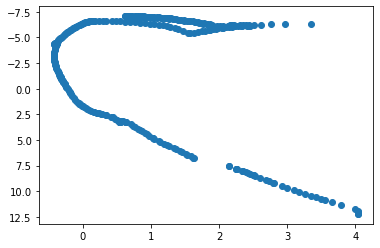

In [13]:
plt.scatter(x,y)
plt.gca().invert_yaxis()

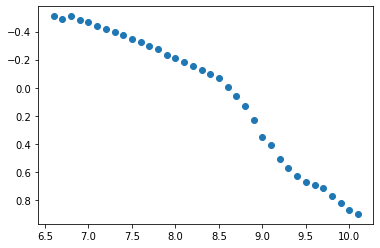

In [15]:
regressoes = pd.read_csv('Regressoes_Isocronas_Gaia.txt')
plt.scatter(regressoes['Age'],regressoes['(BP-RP)TurnOff'])
plt.gca().invert_yaxis()

In [16]:
hm = np.linspace(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), 36)
n = hm[2]-hm[1]
n

0.04019999999999996

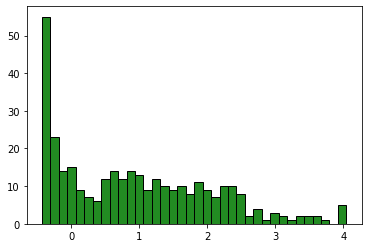

In [17]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'forestgreen'

fig, ax = plt.subplots()
cor = 'forestgreen'
mx, binsx, patches = ax.hist(x,n_bins, ec = 'k',color = cor)

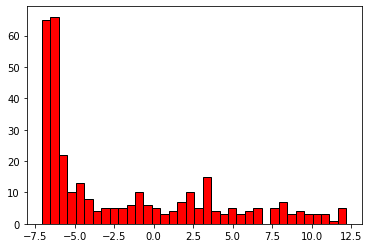

In [18]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'red'

fig, ax = plt.subplots()
my, binsy, patches = ax.hist(y,n_bins, ec = 'k',color = cor)

In [19]:
numero_pontos_cor, cor = np.histogram(x,n_bins)
cor_turnoff = cor[np.where(numero_pontos_cor >= np.median(numero_pontos_cor))[0]]
cor_turnoff = np.median(cor_turnoff)
cor_turnoff

0.9374445138888889

In [9]:
locaisx = np.where(x<=cor_turnoff)[0]
locaisx

array([   0,    1,    2, ..., 1591, 1592, 1593])

In [10]:
y = np.array(y)
magnitudes = y[locaisx]
magnitudes

array([17.316412, 16.931963, 17.916767, ..., 17.163307, 17.770681,
       17.78078 ])

In [15]:
def reject_outliers(data, m = 1.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]
magnitudes = reject_outliers(magnitudes)

In [12]:
mag_turnoff = np.median(magnitudes)
mag_turnoff

17.393814

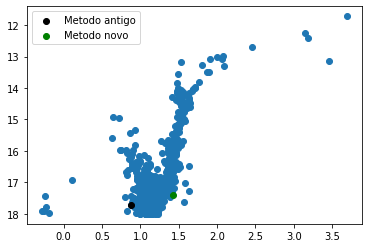

In [13]:
oi = pd.read_csv('regressao_ngc6791.csv')
plt.scatter(oi['TurnOffColor'],oi['TurnOffMag'], color = 'k', zorder = 100, label = 'Metodo antigo')
plt.scatter(x,y)
plt.scatter(cor_turnoff,mag_turnoff,color = 'green', zorder = 100, label = 'Metodo novo')
plt.gca().invert_yaxis()
plt.legend()

In [21]:
AVNN = 0.313
E = (1.09909-0.63831)*AVNN
0.802 + E

0.94622414

In [19]:
cor_turnoff, oi['TurnOffColor'].item()

(1.4282602913888889, 0.880003)